<a href="https://colab.research.google.com/github/solankinitin1210/Capstone-Project-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> 1. Problem Description </b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).


## <b>2. Data Description </b>

### <b>  The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.</b>


### <b>Attribute Information: </b>

## Demographic
* ### Sex : male or female("M" or "F")
* ### Age: Age of the patient (Continuous)

## Behavioral
* ### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* ### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Continuous)
* ### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* ### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* ### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* ### Diabetes: whether or not the patient had diabetes (Nominal)
* ### Tot Chol: total cholesterol level (Continuous)
* ### Sys BP: systolic blood pressure (Continuous)
* ### BMI: Body Mass Index (Continuous)
* ### Heart Rate: heart rate (Continuous)
* ### Glucose: glucose level (Continuous)

## Predict variable (desired target)
* ### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


## **3. Import libraries and dataset**

In [4]:
# Install eli5 for model explainability
!pip install eli5
import eli5 as eli

In [5]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split # Require to prepare train and test data set
from imblearn.over_sampling import SMOTE # SMOTE technique for ovecome class imbalance problem

# Importing ML model for classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Import metrics to measure model perfomance
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [6]:
# Mount driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import CSV file from drive 
df=pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project-3/data_cardiovascular_risk.csv')

In [8]:
# Let's check how our dataset look like
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [10]:
# Let's checke the null values for all the columns
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
# Let's check the statistics of columns
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Initial Observation**

- The dataset provides the patients’ information. It includes over 3390 records and 17 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioural, and medical risk factors.
- Some Columns are contain null values (For ex Education, cigsPerDay , BPMeds , BMI, heartrate, glucose)
- Data contained in every column are in the required datatype
Out of 17 columns, the Number 6 Columns contain the numeric data and 11 columns contain categorical data
- Our Dependent/Target variable is "TenYearCHD", rest are Independent variable
- Our target variable contains the categorical data so our approach will be a classification model of machine learning.

## **4. Clean the Dataset and Deal With the Null Values**

### **4.1 id & education column**
- Id columns do not contain any useful information so it's not required for our analysis
- As we know that heart disease has relation to education, so the education column is again not required in analysis (even in the given PDF document this column is not mentioned)
- So let's drop both id and education columns

In [ ]:
# droping the id and education column
df.drop(columns=['id','education'],inplace=True)

In [ ]:
# Make function to plot distribution chart
def dist_chart(x):
  plt.figure(figsize = (20,40)) #defining chart size
  plt.subplot(9,2,1)
  sns.distplot(x)   # Plot dist plot
  plt.axvline(x.mean(), color='green', linestyle='dashed', linewidth=2) # plot mean line
  plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2) # plot median line
  plt.subplot(9,2,2) 
  sns.boxplot(x) # Plot box chart
  plt.show()

### **4.2 cigsPerDay**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


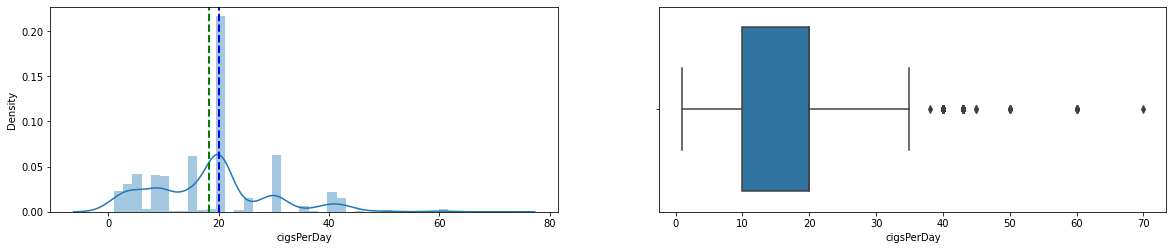

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df[df['is_smoking']=='YES'].cigsPerDay) # Call Chart function

**Observation**
- From the chart, it's observed that Data is normally distributed (not counting the non-smoker's value as it's 0) 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median  

In [ ]:
# Fill the null values with median
df['cigsPerDay'].fillna(df[df['is_smoking']=='YES'].cigsPerDay.median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['cigsPerDay'].isna()] 

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.3 BPMeds**


In [ ]:
#Find the unique values in columns
df['BPMeds'].unique()

array([ 0., nan,  1.])

In [ ]:
# As this is is categorical columns (as it only contains 0 & 1) null value will be replace with the mode of the data
df['BPMeds'].fillna(float(df['BPMeds'].mode()),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['BPMeds'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.4 totChol**

In [ ]:
#Find the unique values in columns
df['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


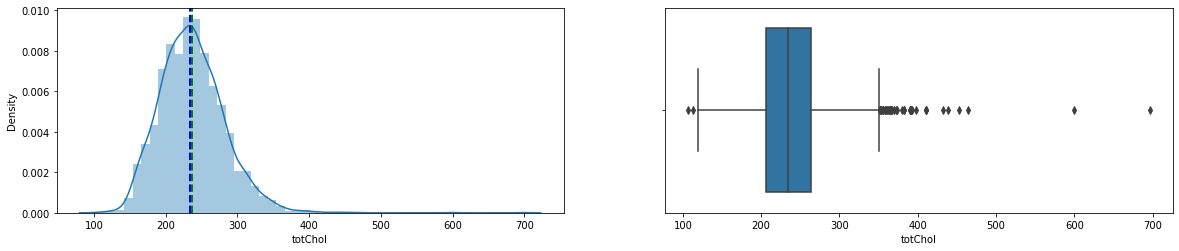

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['totChol'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median

In [ ]:
# Fill the null values with median
df['totChol'].fillna(df['totChol'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['totChol'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.5 BMI**

In [ ]:
# Find the unique values in columns
df['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


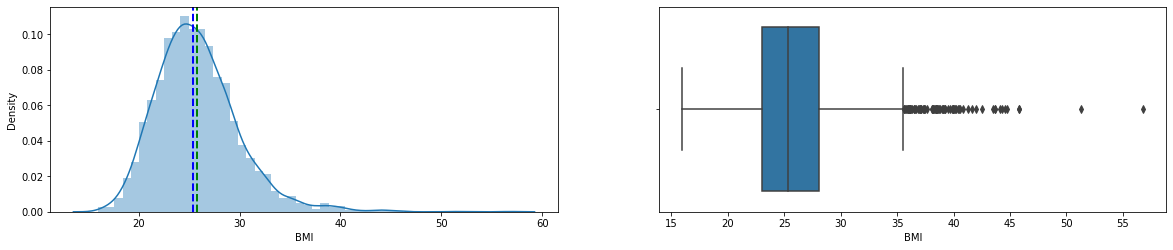

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['BMI'])

**Observation**
- From the chart, it's observed that Data is normally distributed 
- Mean and median values are close to each other
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [ ]:
# Fill the null values with median
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['BMI'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.6 glucose**

In [ ]:
#Find the unique values in columns
df['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


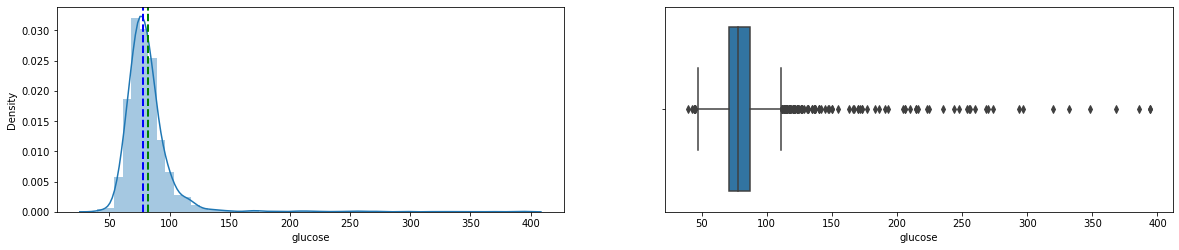

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['glucose'])

**Observation**
- From the chart, it's observed that Data chart is positively skewed
- From the box plot we can see that there are many outliers in data so we'll replace null values with median

In [ ]:
# Fill the null values with median
df['glucose'].fillna(df['glucose'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['glucose'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.7 heartRate**

In [ ]:
#Find the unique values in columns
df['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


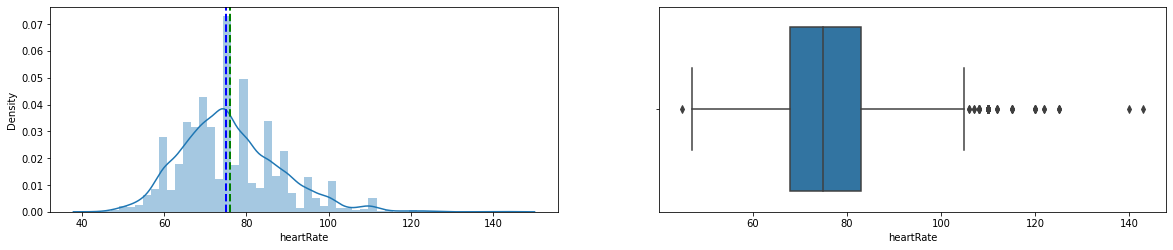

In [ ]:
# Plot the Data distribution chart for column
dist_chart(df['heartRate'])

**Observation**
- From the chart, it's observed that Data chart is somewhat positively skewed
- From the box plot we can see that there are som outliers in data so we'll replace null values with median (There is only one null filed so it will not make effect much)

In [ ]:
# Fill the null values with median
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)

In [ ]:
#Verify that filling done successfull
df[df['heartRate'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


### **4.8 verify that there is no column with null values**

In [ ]:
# Let's checke the null values for all the columns
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **5. Deal with outliers**

In [ ]:
# Define a fuction to find outliers
def get_outlier (x):
  Q1 = np.percentile(x, 25, interpolation = 'midpoint') # find quartile 1 (25 Prentile)
  Q2 = np.percentile(x, 50, interpolation = 'midpoint') # find median  
  Q3 = np.percentile(x, 75, interpolation = 'midpoint') # find quartile 3 (75 Prentile)

  IQR = Q3 - Q1  # find inter quartile range
  print('Interquartile range is', IQR)
  low_lim = Q1 - 1.5 * IQR #define the lower acceptable limit
  up_lim = Q3 + 1.5 * IQR  #define the upper acceptable limit
  print('low_limit is',low_lim)
  print('up_limit is', up_lim)
  outlier =[] 
  for x in x: # iterate over the column to find outlier
      if ((x> up_lim) or (x<low_lim)): # if data point is out of lower and upper range it will be consider as outlier
          outlier.append(x)
  print('outlier in the dataset is', outlier)
  return up_lim,low_lim,outlier

### **5.1 cigsPerDay**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df.loc[df.cigsPerDay>0,'cigsPerDay'])

Interquartile range is 10.0
low_limit is -5.0
up_limit is 35.0
outlier in the dataset is [40.0, 60.0, 60.0, 40.0, 43.0, 40.0, 43.0, 50.0, 40.0, 50.0, 45.0, 40.0, 45.0, 43.0, 40.0, 43.0, 40.0, 43.0, 40.0, 60.0, 43.0, 40.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 50.0, 40.0, 40.0, 43.0, 40.0, 43.0, 60.0, 43.0, 43.0, 43.0, 40.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 50.0, 43.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 43.0, 40.0, 40.0, 43.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 60.0, 40.0, 50.0, 40.0, 43.0, 40.0, 40.0, 60.0, 40.0, 40.0, 43.0, 43.0, 40.0, 43.0, 43.0, 60.0, 50.0, 40.0, 43.0, 43.0, 43.0, 40.0, 43.0, 40.0, 40.0, 40.0, 43.0, 40.0, 40.0, 40.0, 43.0, 43.0, 43.0, 43.0, 40.0, 70.0, 43.0, 43.0, 43.0, 40.0, 40.0, 40.0, 43.0, 40.0, 38.0, 40.0, 43.0, 43.0, 60.0]


In [ ]:
# Replace outliers with upper limit (no need to deal with lower limit)
df.loc[df.cigsPerDay > up_lim,'cigsPerDay']=up_lim

### **5.2 Heartrate**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df['heartRate'])

Interquartile range is 15.0
low_limit is 45.5
up_limit is 105.5
outlier in the dataset is [110.0, 110.0, 110.0, 112.0, 110.0, 120.0, 110.0, 110.0, 106.0, 110.0, 110.0, 115.0, 110.0, 107.0, 110.0, 143.0, 110.0, 110.0, 112.0, 110.0, 107.0, 45.0, 110.0, 120.0, 108.0, 115.0, 110.0, 108.0, 110.0, 110.0, 110.0, 125.0, 125.0, 120.0, 115.0, 125.0, 110.0, 122.0, 110.0, 110.0, 122.0, 110.0, 106.0, 110.0, 120.0, 110.0, 140.0, 108.0, 115.0, 120.0, 110.0, 110.0, 108.0, 110.0, 108.0, 110.0, 108.0, 110.0, 110.0, 112.0, 108.0, 110.0, 110.0, 110.0]


In [ ]:
# outlier data greater than upper limit will be rplace with upper limit
df.loc[df.heartRate > up_lim,'heartRate']=up_lim 

# outlier data less than upper limit will be rplace with lower limit
df.loc[df.heartRate < low_lim,'heartRate']=low_lim 

### **5.3 glucose**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df['glucose'])

Interquartile range is 13.0
low_limit is 52.5
up_limit is 104.5
outlier in the dataset is [132.0, 105.0, 170.0, 107.0, 177.0, 118.0, 120.0, 173.0, 163.0, 205.0, 115.0, 120.0, 268.0, 137.0, 106.0, 348.0, 110.0, 120.0, 115.0, 106.0, 122.0, 108.0, 255.0, 140.0, 105.0, 124.0, 244.0, 106.0, 115.0, 294.0, 112.0, 113.0, 254.0, 132.0, 116.0, 52.0, 50.0, 120.0, 110.0, 114.0, 127.0, 140.0, 113.0, 135.0, 45.0, 206.0, 140.0, 105.0, 105.0, 105.0, 117.0, 112.0, 107.0, 126.0, 113.0, 45.0, 131.0, 113.0, 114.0, 116.0, 394.0, 116.0, 120.0, 107.0, 123.0, 114.0, 118.0, 270.0, 107.0, 320.0, 129.0, 112.0, 107.0, 115.0, 142.0, 106.0, 112.0, 107.0, 120.0, 52.0, 235.0, 116.0, 115.0, 40.0, 126.0, 117.0, 118.0, 150.0, 120.0, 136.0, 113.0, 107.0, 118.0, 112.0, 191.0, 117.0, 44.0, 394.0, 124.0, 173.0, 127.0, 50.0, 119.0, 117.0, 109.0, 113.0, 105.0, 108.0, 110.0, 112.0, 121.0, 43.0, 117.0, 108.0, 256.0, 113.0, 145.0, 113.0, 105.0, 117.0, 47.0, 297.0, 118.0, 166.0, 172.0, 48.0, 132.0, 111.0, 106.0, 107.0, 113.0, 115

In [ ]:
# outlier data greater than upper limit will be rplace with upper limit
df.loc[df.glucose > up_lim,'glucose']=up_lim

# outlier data less than upper limit will be rplace with lower limit
df.loc[df.glucose < low_lim,'glucose']=low_lim

### **5.4 BMI**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df['BMI'])

Interquartile range is 4.964999999999996
low_limit is 15.582500000000007
up_limit is 35.442499999999995
outlier in the dataset is [35.58, 43.69, 36.54, 35.96, 35.62, 38.42, 36.11, 38.14, 44.09, 35.99, 39.94, 39.82, 40.21, 38.96, 38.53, 37.38, 39.69, 35.85, 38.54, 37.1, 39.94, 36.07, 35.78, 38.43, 51.28, 41.29, 35.45, 36.91, 38.31, 56.8, 39.21, 38.11, 36.65, 39.04, 35.68, 44.27, 39.17, 38.75, 45.79, 36.81, 38.46, 36.21, 37.48, 36.52, 40.38, 36.62, 37.15, 38.82, 35.53, 42.0, 43.48, 37.04, 37.62, 40.58, 39.22, 37.02, 36.12, 42.53, 38.17, 40.08, 37.41, 37.3, 40.11, 40.81, 39.53, 40.52, 36.18, 39.08, 44.55, 39.91, 38.39, 36.01, 41.61, 44.71, 43.67, 45.8, 38.61, 36.29, 38.06]


In [ ]:
# outlier data greater than upper limit will be rplace with upper limit
df.loc[df.BMI > up_lim,'BMI']=up_lim

# outlier data less than upper limit will be rplace with lower limit
df.loc[df.BMI < low_lim,'BMI']=low_lim

### **5.5 sysBP**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df['sysBP'])

Interquartile range is 27.0
low_limit is 76.5
up_limit is 184.5
outlier in the dataset is [232.0, 185.0, 186.5, 193.0, 192.0, 207.0, 202.0, 244.0, 186.0, 191.0, 191.5, 193.0, 195.0, 185.5, 190.0, 212.0, 210.0, 202.5, 215.0, 196.0, 248.0, 215.0, 195.0, 208.0, 194.0, 204.0, 186.0, 188.0, 214.0, 188.5, 187.0, 192.5, 197.0, 185.0, 197.0, 190.0, 186.5, 190.0, 196.0, 230.0, 187.0, 185.0, 205.0, 205.0, 200.0, 199.0, 185.0, 210.0, 189.0, 200.0, 191.0, 198.0, 200.0, 193.0, 200.0, 209.0, 195.0, 199.0, 189.0, 295.0, 235.0, 204.0, 188.0, 195.0, 198.0, 197.5, 190.0, 199.0, 188.0, 206.0, 215.0, 210.0, 243.0, 205.5, 192.5, 193.0, 189.0, 192.0, 189.0, 187.0, 187.5, 206.0, 191.0, 206.0, 196.0, 185.0, 195.0, 196.0, 195.0, 190.0, 220.0, 217.0, 189.0, 185.0, 213.0, 188.0, 190.0, 185.0, 220.0, 192.5, 213.0, 210.0, 207.5, 197.5, 187.0]


In [ ]:
# outlier data greater than upper limit will be rplace with upper limit
df.loc[df.sysBP > up_lim,'sysBP']=up_lim

# outlier data less than upper limit will be rplace with lower limit
df.loc[df.sysBP < low_lim,'sysBP']=low_lim

### **5.6 totChol**

In [ ]:
# Call Outlier function and find outlier in columns
up_lim,low_lim,outlier=get_outlier(df['totChol'])

Interquartile range is 58.0
low_limit is 119.0
up_limit is 351.0
outlier in the dataset is [382.0, 391.0, 439.0, 600.0, 356.0, 696.0, 361.0, 382.0, 464.0, 391.0, 362.0, 390.0, 360.0, 352.0, 366.0, 366.0, 370.0, 372.0, 365.0, 113.0, 392.0, 353.0, 367.0, 390.0, 398.0, 453.0, 358.0, 363.0, 107.0, 352.0, 354.0, 373.0, 410.0, 380.0, 366.0, 432.0, 410.0, 358.0, 355.0, 364.0, 352.0, 410.0, 352.0]


In [ ]:
# outlier data greater than upper limit will be rplace with upper limit
df.loc[df.totChol > up_lim,'totChol']=up_lim

# outlier data less than upper limit will be rplace with lower limit
df.loc[df.totChol < low_lim,'totChol']=low_lim

## **6. EDA**

In [ ]:
#Define Function
def Catergory_Analysis(z):
  
  # get the unique values in coulumn
  print('***Total unique values contain by column***')
  display(df[z].unique())
  
  # Get the table which display count of dependent variable count for each uniqe value in column
  y=df.groupby(z).agg({'age':'count', 'TenYearCHD': 'sum'}).reset_index().rename(columns={'age':'Total_Patient','TenYearCHD':'TenYearCHD_Patient'})
  
  # Add percentage columns in table
  y['CHD_Risk(%)']=round(y['TenYearCHD_Patient']/y['Total_Patient']*100,2)
  y['No_Risk(%)']=round((y['Total_Patient']-y['TenYearCHD_Patient'])/y['Total_Patient']*100,2)
  print(f'\n ***{z} Analysis Table*** \n')
  display(y)
 
  # plot the table data
  print('\n ***Plot Percentage Chart*** \n')
  #display(y[[z,'risk per']])
  plt.figure(figsize = (20,40)) #Define Chart size
  y.plot.bar(x=z,y=['CHD_Risk(%)','No_Risk(%)'])

In [ ]:
def conti_Analysis(c):
  d=df.groupby(c)['TenYearCHD'].sum().reset_index().sort_values(by='TenYearCHD',ascending=False)
  plt.figure(figsize = (20,5))
  sns.lineplot(data=d,x=c,y='TenYearCHD')
  plt.show()


### **6.1 TenYearCHD wise analysis variable**

In [ ]:
#Call Analysis function for 'diabetes' variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd7e1b55b90>,
 [Text(-0.9789475551056555, 0.5016589322962961, 'No-TenYearCHD'),
  Text(0.9789475551056555, -0.5016589322962962, 'TenYearCHD')],
 [Text(-0.5339713936939938, 0.27363214488888876, '84.93%'),
  Text(0.5339713936939938, -0.2736321448888888, '15.07%')])

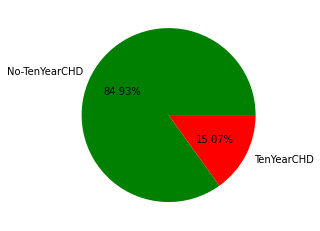

In [ ]:
plt.pie(df['TenYearCHD'].value_counts(),labels=['No-TenYearCHD','TenYearCHD'],autopct='%0.2f%%',colors=['green','red'])

**observation**

From above chart It's observed that 15.07 % of the Patient with the risk of Cardiovascular in ten years and rest have no risk, this is clearly shows that data is imbalanced 

### **6.2 Gender wise EDA**


***Total unique values contain by column***


array(['F', 'M'], dtype=object)


 ***sex Analysis Table*** 



,sex,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,F,1923,239,12.43,87.57
1,M,1467,272,18.54,81.46



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

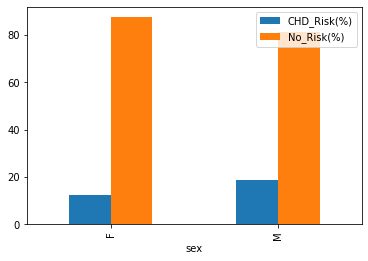

In [ ]:
#Call Analysis function for 'sex' variable
Catergory_Analysis('sex')

### **6.3 Smoker wise Analysis**

***Total unique values contain by column***


array(['YES', 'NO'], dtype=object)


 ***is_smoking Analysis Table*** 



,is_smoking,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,NO,1703,236,13.86,86.14
1,YES,1687,275,16.30,83.70



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

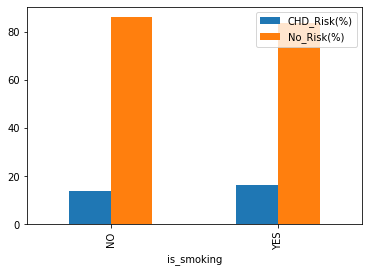

In [ ]:
#Call Analysis function for 'is_smoking' variable
Catergory_Analysis('is_smoking')

### **6.4 diabetes wise Analysis**

***Total unique values contain by column***


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

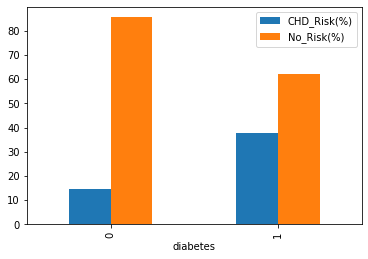

In [ ]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

### **6.5 BPMeds wise Analysis**

***Total unique values contain by column***


array([0., 1.])


 ***BPMeds Analysis Table*** 



,BPMeds,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0.0,3290,478,14.53,85.47
1,1.0,100,33,33.00,67.00



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

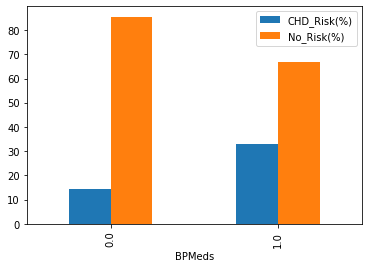

In [ ]:
#Call Analysis function for 'BPMeds' variable
Catergory_Analysis('BPMeds')

### **6.6 prevalentStroke wise Analysis**

***Total unique values contain by column***


array([0, 1])


 ***prevalentStroke Analysis Table*** 



,prevalentStroke,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3368,501,14.88,85.12
1,1,22,10,45.45,54.55



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

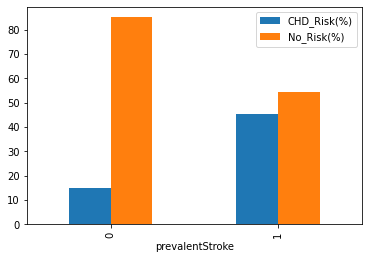

In [ ]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentStroke')

### **6.7 prevalentHyp wise analysis variable**

***Total unique values contain by column***


array([0, 1])


 ***prevalentHyp Analysis Table*** 



,prevalentHyp,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,2321,256,11.03,88.97
1,1,1069,255,23.85,76.15



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

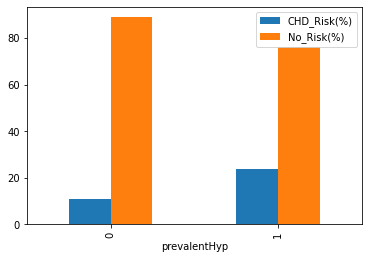

In [ ]:
#Call Analysis function for 'prevalentStroke' variable
Catergory_Analysis('prevalentHyp')

### **6.8 diabetes wise analysis variable**

***Total unique values contain by column***


array([0, 1])


 ***diabetes Analysis Table*** 



,diabetes,Total_Patient,TenYearCHD_Patient,CHD_Risk(%),No_Risk(%)
0,0,3303,478,14.47,85.53
1,1,87,33,37.93,62.07



 ***Plot Percentage Chart*** 



<Figure size 1440x2880 with 0 Axes>

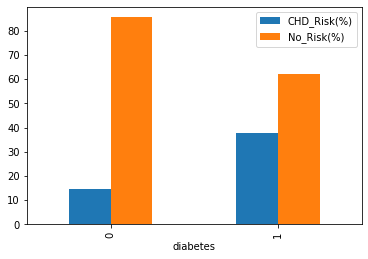

In [ ]:
#Call Analysis function for 'diabetes' variable
Catergory_Analysis('diabetes')

### **6.8 Check correlation by ploting heatmap**

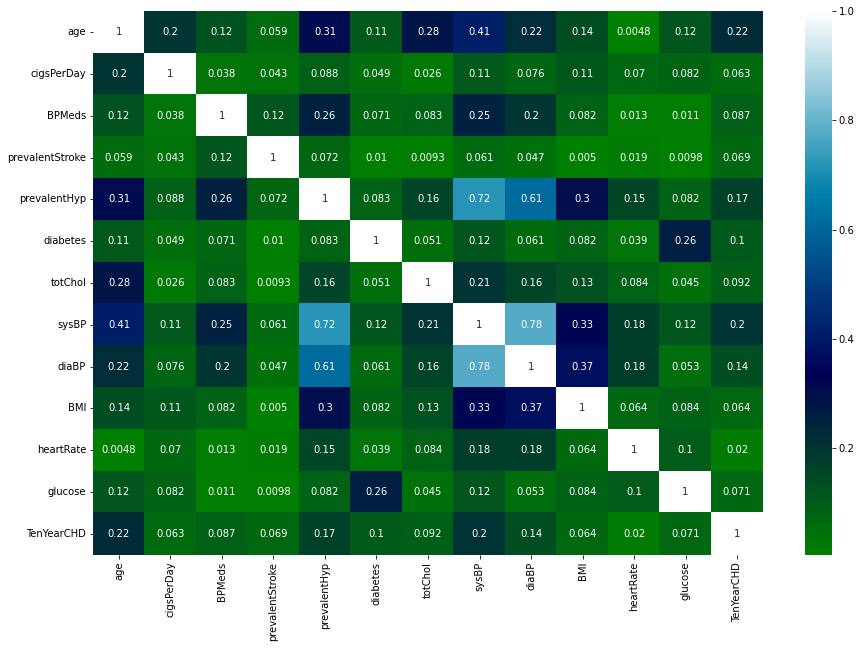

In [ ]:
# Heatmap of correlation
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()),cmap='ocean',annot=True)

##<b> 7. Prepare Data for algoritmes

In [ ]:
df.columns

Index(['age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **7.1 One hot coding for Categoric variable**

In [ ]:
# Oe-hot coding using dummies function
df=pd.get_dummies(df,columns=['sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes'])

In [ ]:
#Checking updated dataset
df.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,...,is_smoking_NO,is_smoking_YES,BPMeds_0.0,BPMeds_1.0,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0,1,1,...,0,1,1,0,1,0,1,0,1,0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,...,1,0,1,0,1,0,0,1,1,0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,...,0,1,1,0,1,0,1,0,1,0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,...,0,1,1,0,1,0,0,1,1,0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
# Define independent and target variables
x =df.drop(columns=['TenYearCHD'])
y =df['TenYearCHD']

### **7.2 Over sampling using smote**

In [ ]:
# to overcome data imbalance issue SMOTE tech. is used
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x,y)

print('Original dataset shape', len(df)) # print original dataset shape
print('Resampled dataset shape', len(y_smote)) # print updated(after overcome data imbalance) dataset shape

Original dataset shape 3390
Resampled dataset shape 5758


### **7.3 Split data into train and test set**

In [ ]:
# split the data set into train and test set
X_train,x_test,Y_train,y_test=train_test_split(x_smote, y_smote,test_size=0.25,random_state=1)

In [ ]:
# check train data shape
X_train.shape

(4318, 20)

In [ ]:
# check test data shape
x_test.shape

(1440, 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

### **7.4 Define Metric & explainability Functions**

In [ ]:
#Define train and test score board
train_score_board={}
test_score_board={}

In [ ]:
# define metrics function
def get_metrics(model,Y_train,y_train_pred,y_test,y_test_pred): # take predected y values and model name as argument
  
  train_accuracy=accuracy_score(Y_train, y_train_pred) # calculate accuracy of train dataset
  train_precision = precision_score(Y_train, y_train_pred) # calculate precision of train dataset
  train_recall = recall_score(Y_train, y_train_pred) # calculate recall score of train dataset
  train_f1 = f1_score(Y_train, y_train_pred) # calculate f1 score of train dataset
  train_roc = roc_auc_score(Y_train, y_train_pred) # calculate roc auc score of train dataset

  # print score for train data
  print('**** Train Dataset Score ****')
  print('train_accuracy {}'.format(train_accuracy)) 
  print('train_precision is {}'.format(train_precision))
  print('train_recall is {}'.format(train_recall))
  print('train_f1 is {}'.format(train_f1))
  print('train_roc is {}'.format(train_roc))
  
 
  test_accuracy=accuracy_score(y_test, y_test_pred) # calculate accuracy of train dataset
  test_precision = precision_score(y_test, y_test_pred) # calculate precision of train dataset
  test_recall = recall_score(y_test, y_test_pred) # calculate recall score of train dataset
  test_f1 = f1_score(y_test, y_test_pred) # calculate f1 score of train dataset
  test_roc = roc_auc_score(y_test, y_test_pred) # calculate roc auc score of train dataset

  # print score for test data
  print('\n**** Test Dataset Score ****')
  print('test_accuracy is {}'.format(test_accuracy))
  print('test_precision is {}'.format(test_precision))
  print('test_recall is {}'.format(test_recall))
  print('test_f1 is {}'.format(test_f1))
  print('test_roc is {}'.format(test_roc))

  # print confusion matrix
  print('\n**** Confusion Matrix on train set ****')
  cm = confusion_matrix(y_test, y_test_pred)
  sns.heatmap(cm,annot = True, fmt = "d") # plot confusion matrix using heat map
  plt.show()
  
  # plot ROC-AUC curve
  print('\n**** Plot ROC-AUC Curve ****')
  fpr, tpr, _ = roc_curve(y_test, y_test_pred) # find fpr and tpr
  plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc))
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.legend(loc=4)
  plt.show()

  # Update train score board
  train_score_board[model]={'Accuracy':train_accuracy,'Precision':train_precision,'Recall':train_recall,'F1_Score':train_f1,'Roc_Score':train_roc}
  
  # Update test score board
  test_score_board[model]={'Accuracy':test_accuracy,'Precision':test_precision,'Recall':test_recall,'F1_Score':test_f1,'Roc_Score':test_roc}

  return

In [ ]:
# Define function for model explainability
def eli5_explainability(model,row_number) : # take model best estimator and row number from dataset as argument
  z=pd.DataFrame(x_test) # convert test set to dataframe 
  return eli.show_prediction(model, np.array(z.iloc[row_number]),
                    feature_names=x.columns.values,
                    show_feature_values=True)

## **8. Run Diffrent ML models**

### **8.1 Logistic Regression**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
LR_para = {'C': [10],#0.001,0.01,0.1,1,100,1000
                       'penalty':['l2','l1', 'elasticnet','None'],
                       'class_weight':['balanced']#,'dict'
            }
# using grid search cv for hyperparameter tuning
logistic = GridSearchCV(LogisticRegression(),param_grid=LR_para,cv=5,verbose=True,scoring='recall',n_jobs=-1)

# fit train and test dataset into model
logistic.fit(X_train,Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10], 'class_weight': ['balanced'],
                         'penalty': ['l2', 'l1', 'elasticnet', 'None']},
             scoring='recall', verbose=True)

In [ ]:
# assign best estimator to a variable
lr_best=logistic.best_estimator_

**** Train Dataset Score ****
train_accuracy 0.7918017600741084
train_precision is 0.8852657004830918
train_recall is 0.6740229885057472
train_f1 is 0.7653354215609502
train_roc is 0.792681116278072

**** Test Dataset Score ****
test_accuracy is 0.79375
test_precision is 0.8720292504570384
test_recall is 0.6775568181818182
test_f1 is 0.762589928057554
test_roc is 0.7912240612648223

**** Confusion Matrix on train set ****


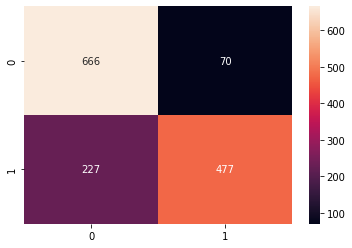


**** Plot ROC-AUC Curve ****


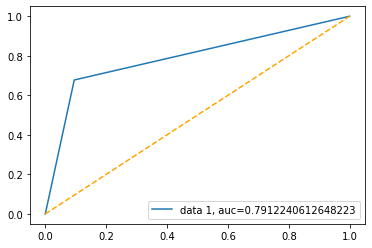

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=logistic.predict(X_train)
y_test_pred=logistic.predict(x_test)

# call score metrix to get score for train and test set 
get_metrics("Logistic",Y_train,y_train_pred,y_test,y_test_pred)

### **8.2 SVC**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
svc_pera={'C': [100],#0.1, 1, 10, 
          'kernel': ['poly'] #'rbf','linear', 'sigmoid'
          }

# using grid search cv for hyperparameter tuning
svc = GridSearchCV(SVC(),param_grid=svc_pera,cv=5,verbose=True,scoring='recall',n_jobs=-1)

# fit train and test dataset into model
svc.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100], 'kernel': ['poly']}, scoring='recall',
             verbose=True)

In [ ]:
# assign best estimator to a variable
svc_best=svc.best_estimator_

**** Train Dataset Score ****
train_accuracy 0.8698471514590088
train_precision is 0.9062972292191436
train_recall is 0.8271264367816092
train_f1 is 0.8649038461538461
train_roc is 0.870166111531262

**** Test Dataset Score ****
test_accuracy is 0.8180555555555555
test_precision is 0.8318318318318318
test_recall is 0.7869318181818182
test_f1 is 0.8087591240875913
test_roc is 0.81737895256917

**** Confusion Matrix on train set ****


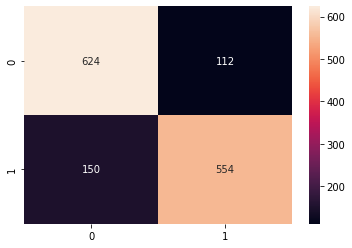


**** Plot ROC-AUC Curve ****


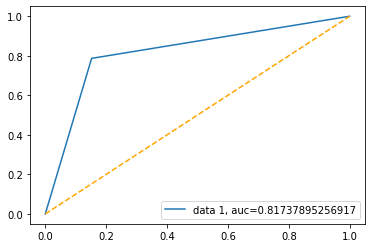

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=svc.predict(X_train)
y_test_pred=svc.predict(x_test)

# call score metrix to get score for train and test set
get_metrics('SVC',Y_train,y_train_pred,y_test,y_test_pred)

### **8.3 K Nearest Neighbour**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
knn_para = {
    'n_neighbors':[12],#2,4,6,8,10,15,20
    'weights':['distance'],# 'uniform' 
    'algorithm':['auto'],# 'ball_tree', 'kd_tree', 'brute','auto',],
    'leaf_size':[20]#15,10,30,40,50,60,70]
}

# using grid search cv for hyperparameter tuning
knn = GridSearchCV(KNeighborsClassifier(),param_grid=knn_para,cv=5,scoring='recall',verbose=True,n_jobs=-1)

# fit train and test dataset into model
knn.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [20],
                         'n_neighbors': [12], 'weights': ['distance']},
             scoring='recall', verbose=True)

In [ ]:
# assign best estimator to a variable
knn_best=knn.best_estimator_

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.8638888888888889
test_precision is 0.8350923482849604
test_recall is 0.8991477272727273
test_f1 is 0.86593707250342
test_roc is 0.864655385375494

**** Confusion Matrix on train set ****


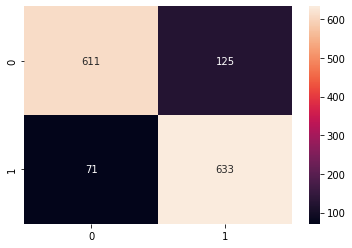


**** Plot ROC-AUC Curve ****


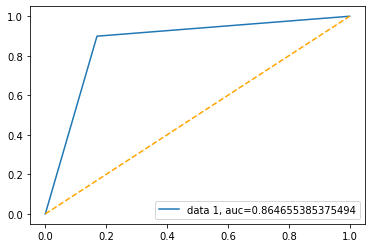

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(x_test)

# call score metrix to get score for train and test set
get_metrics('KNN',Y_train,y_train_pred,y_test,y_test_pred)

### **8.4 Decision Tree**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
d_tree_para = {
    'max_depth': [10,2, 3, 5, 20],
    'min_samples_leaf': [100,50],
    'criterion': ["entropy",],#"gini", ]
}

# using grid search cv for hyperparameter tuning
D_tree = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_para,cv=5,verbose=True,n_jobs=-1)

# fit train and test dataset into model
D_tree.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [10, 2, 3, 5, 20],
                         'min_samples_leaf': [100, 50]},
             verbose=True)

In [ ]:
# assign best estimator to a variable
dt_best=D_tree.best_estimator_

**** Train Dataset Score ****
train_accuracy 0.7850856878184345
train_precision is 0.8208955223880597
train_recall is 0.7333333333333333
train_f1 is 0.7746478873239437
train_roc is 0.7854720796391351

**** Test Dataset Score ****
test_accuracy is 0.7381944444444445
test_precision is 0.7550702028081123
test_recall is 0.6875
test_f1 is 0.7197026022304832
test_roc is 0.7370923913043479

**** Confusion Matrix on train set ****


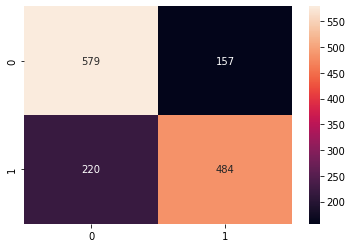


**** Plot ROC-AUC Curve ****


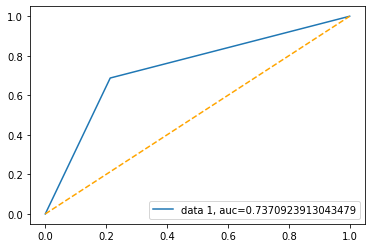

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=D_tree.predict(X_train)
y_test_pred=D_tree.predict(x_test)

# call score metrix to get score for train and test set
get_metrics('D-tree',Y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
# call model explainability function
eli5_explainability(D_tree.best_estimator_,2)

### **8.5 Random Forest**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
rf_para = { 'n_estimators': [200], #,50,1000,1500
              'criterion':['entropy'],#'gini'],
              'min_samples_leaf':[5],#,6,10,30
              'max_depth' : [100],#50,20,30,7,80,150,200,250
              'min_samples_split': [10], #15,20,30
              'max_features':['sqrt',]
              }

# using grid search cv for hyperparameter tuning
rf_grid = GridSearchCV(RandomForestClassifier(),rf_para,cv=5,scoring='recall',verbose=True,n_jobs=-1)

# fit train and test dataset into model
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [100],
                         'max_features': ['sqrt'], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [200]},
             scoring='recall', verbose=True)

In [ ]:
# assign best estimator to a variable
rf_best=rf_grid.best_estimator_

**** Train Dataset Score ****
train_accuracy 0.9541454377026402
train_precision is 0.9805542051531356
train_recall is 0.9273563218390805
train_f1 is 0.9532136105860113
train_roc is 0.9543454497669503

**** Test Dataset Score ****
test_accuracy is 0.8736111111111111
test_precision is 0.886094674556213
test_recall is 0.8508522727272727
test_f1 is 0.8681159420289856
test_roc is 0.8731163537549407

**** Confusion Matrix on train set ****


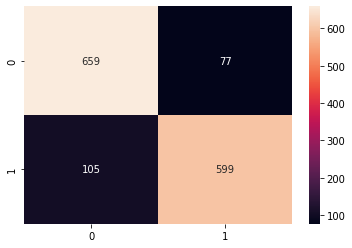


**** Plot ROC-AUC Curve ****


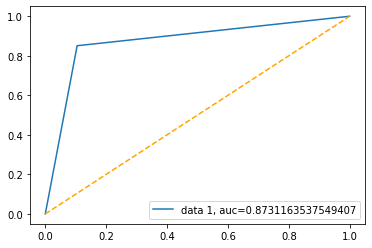

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=rf_grid.predict(X_train)
y_test_pred=rf_grid.predict(x_test)

# call score metrix to get score for train and test set
get_metrics('Random Forest',Y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
# call model explainability function
eli5_explainability(rf_grid.best_estimator_,2)

###<b> 8.6 Gradient Boosting

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
gb_para = {
    'max_depth': [17], #10,15,20,25],
    'learning_rate': [1.0],#0.005,0.001,0.01,0.1,
    'min_samples_leaf':[25],#20,15,20
    'min_samples_split':[55] #60,70,65,50,
  }

In [ ]:
# using grid search cv for hyperparameter tuning
Grad_boost = GridSearchCV(GradientBoostingClassifier(),gb_para,cv=2,scoring='recall',verbose=4,n_jobs=-1)

# fit train and test dataset into model
Grad_boost.fit(X_train,Y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0], 'max_depth': [17],
                         'min_samples_leaf': [25], 'min_samples_split': [55]},
             scoring='recall', verbose=4)

In [ ]:
# assign best estimator to a variable
gb_best=Grad_boost.best_estimator_

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=Grad_boost.predict(X_train)
y_test_pred=Grad_boost.predict(x_test)

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.9048611111111111
test_precision is 0.9079136690647482
test_recall is 0.8963068181818182
test_f1 is 0.9020729092208721
test_roc is 0.9046751482213441

**** Confusion Matrix on train set ****


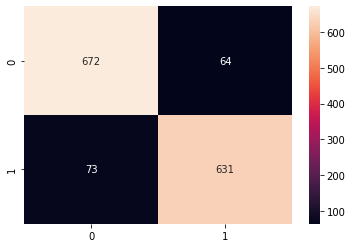


**** Plot ROC-AUC Curve ****


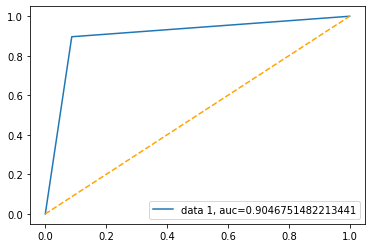

In [ ]:
# call score metrix to get score for train and test set
get_metrics('G-Boost',Y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
# call model explainability function
eli5_explainability(Grad_boost.best_estimator_,2)

### **8.7 Extreme Gradient Boosting**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
xgb_para = {
          'n_estimators': [1500],#,2000,1000,200,50 
          'max_depth': [15],#2,4,8,10,20 
          'learning_rate': [0.06], #0.02,0.04, 
          'colsample_bytree': [1.0],#0.7,0.5,1.5
          'subsample': [0.7],#0.5,0.3, 
          'n_thread': [4],#2,6
          }

# using grid search cv for hyperparameter tuning          
xgb= GridSearchCV(XGBClassifier(),param_grid=xgb_para,scoring='recall',cv=5,n_jobs=-1)

# fit train and test dataset into model
xgb.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [1.0], 'learning_rate': [0.06],
                         'max_depth': [15], 'n_estimators': [1500],
                         'n_thread': [4], 'subsample': [0.7]},
             scoring='recall')

In [ ]:
# assign best estimator to a variable
xgb_best=xgb.best_estimator_

**** Train Dataset Score ****
train_accuracy 1.0
train_precision is 1.0
train_recall is 1.0
train_f1 is 1.0
train_roc is 1.0

**** Test Dataset Score ****
test_accuracy is 0.9118055555555555
test_precision is 0.9175108538350217
test_recall is 0.9005681818181818
test_f1 is 0.9089605734767024
test_roc is 0.9115612648221343

**** Confusion Matrix on train set ****


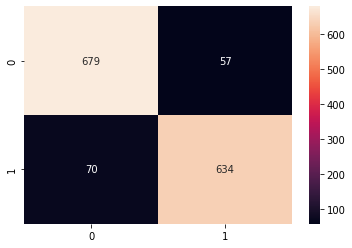


**** Plot ROC-AUC Curve ****


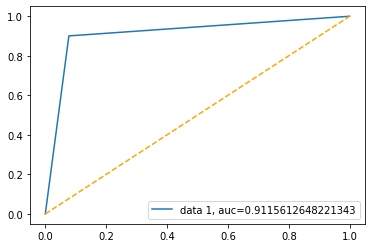

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(x_test)

# call score metrix to get score for train and test set
get_metrics('XG-Boost',Y_train,y_train_pred,y_test,y_test_pred)

In [ ]:
# call model explainability function
eli5_explainability(xgb.best_estimator_,2)

### **8.8 Stacking**

In [ ]:
# Define hyperparameters for model (after finding the best estimator rest are commented to reduce run time)
estimators = [('lr',lr_best),('svc',svc_best),('rf',rf_best),('gb',gb_best),('dt',dt_best)]

final_estimator = xgb_best

# using grid search cv for hyperparameter tuning          
stacking=StackingClassifier(estimators=estimators,final_estimator=final_estimator,passthrough=True,n_jobs=-1)

# fit train and test dataset into model
stacking.fit(X_train,Y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=10,
                                                   class_weight='balanced')),
                               ('svc', SVC(C=100, kernel='poly')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=100,
                                                       max_features='sqrt',
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_estimators=200)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=1.0,
                                                           max_depth=17,
                                                           min_samples_leaf=25,
    

**** Train Dataset Score ****
train_accuracy 0.9983788791106994
train_precision is 0.9981617647058824
train_recall is 0.9986206896551724
train_f1 is 0.9983911744426569
train_roc is 0.9983770737123272

**** Test Dataset Score ****
test_accuracy is 0.9083333333333333
test_precision is 0.9333333333333333
test_recall is 0.875
test_f1 is 0.9032258064516129
test_roc is 0.9076086956521738

**** Confusion Matrix on train set ****


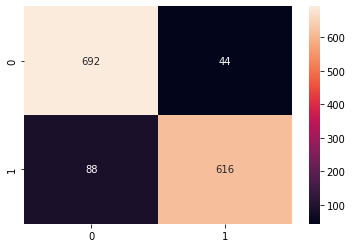


**** Plot ROC-AUC Curve ****


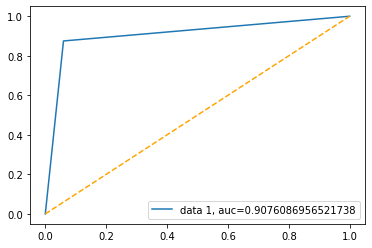

In [ ]:
# Get predicted Y for train and test dataset 
y_train_pred=stacking.predict(X_train)
y_test_pred=stacking.predict(x_test)

# call model explainability function
get_metrics('Stacking',Y_train,y_train_pred,y_test,y_test_pred)

## **9. Score Board**

### 9.1 Training Data Score

In [ ]:
# Score board for train dataset
Train_Finale_Score=pd.DataFrame(train_score_board)
Train_Finale_Score=np.transpose(Train_Finale_Score).reset_index().rename(columns={'index':'Model'}).sort_values(by='Recall',ascending=False)
Train_Finale_Score

,Model,Accuracy,Precision,Recall,F1_Score,Roc_Score
2,KNN,1.000000,1.000000,1.000000,1.000000,1.000000
5,G-Boost,1.000000,1.000000,1.000000,1.000000,1.000000
6,XG-Boost,1.000000,1.000000,1.000000,1.000000,1.000000
7,Stacking,0.998379,0.998162,0.998621,0.998391,0.998377
4,Random Forest,0.954145,0.980554,0.927356,0.953214,0.954345
1,SVC,0.869847,0.906297,0.827126,0.864904,0.870166
3,D-tree,0.785086,0.820896,0.733333,0.774648,0.785472
0,Logistic,0.791802,0.885266,0.674023,0.765335,0.792681


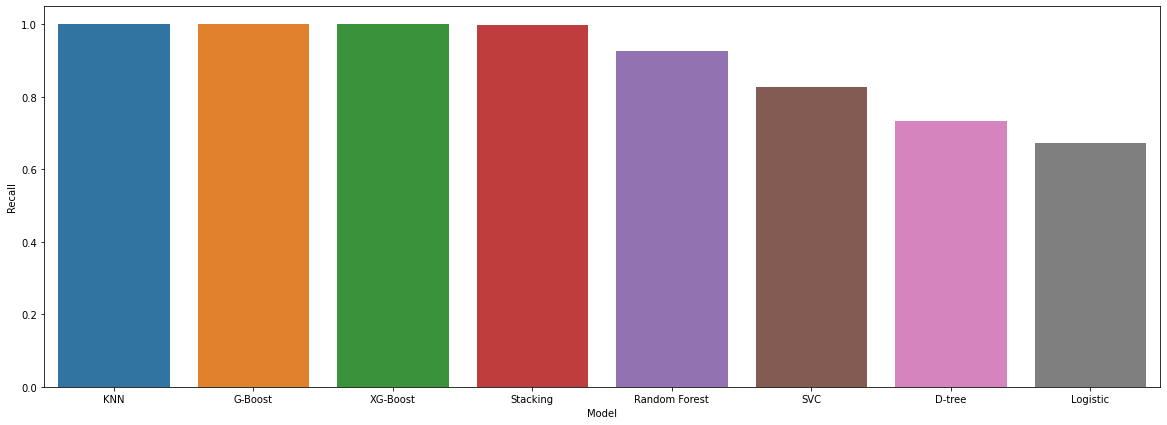

In [ ]:
# Plot recall-score for train dataset
plt.figure(figsize = (20,7))
sns.barplot(x='Model',y='Recall',data=Train_Finale_Score)

### 9.2 Testing Data Score

In [ ]:
# Score board for test dataset
Test_Finale_Score=pd.DataFrame(test_score_board)
Test_Finale_Score=np.transpose(Test_Finale_Score).reset_index().rename(columns={'index':'Model'}).sort_values(by='Recall',ascending=False)
Test_Finale_Score

,Model,Accuracy,Precision,Recall,F1_Score,Roc_Score
6,XG-Boost,0.911806,0.917511,0.900568,0.908961,0.911561
2,KNN,0.863889,0.835092,0.899148,0.865937,0.864655
5,G-Boost,0.904861,0.907914,0.896307,0.902073,0.904675
7,Stacking,0.908333,0.933333,0.875000,0.903226,0.907609
4,Random Forest,0.873611,0.886095,0.850852,0.868116,0.873116
1,SVC,0.818056,0.831832,0.786932,0.808759,0.817379
3,D-tree,0.738194,0.755070,0.687500,0.719703,0.737092
0,Logistic,0.793750,0.872029,0.677557,0.762590,0.791224


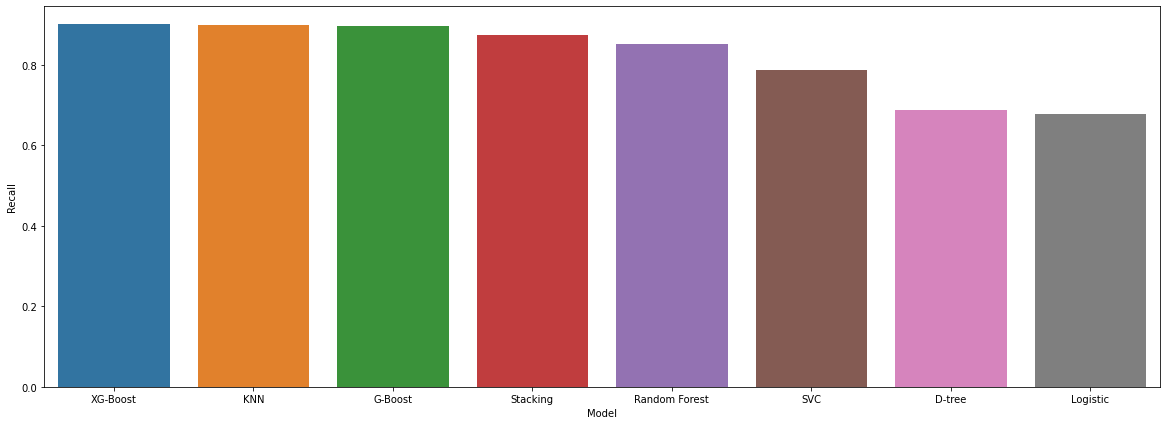

In [ ]:
# Plot recall-score for test dataset
plt.figure(figsize = (20,7))
sns.barplot(x='Model',y='Recall',data=Test_Finale_Score)

## **10. Conclusion**

- Machine Learning algorithm K-Nearest Neighbour, Gradient boosting and XG Boosting performed the best with a recall of 1.0 on the train data set
- KNN and Gradient boosting performed the best on test data with a recall score of 0.93 and 0.90 respectively
- Logistic Regression is the least accurate as compared to other models performed.
- Model Explanibililty was performed on extrema gradient boosting using eli5 and it’s observed that sex(gender) has the most significant impact on the target variable whether the patient will have the risk of CHD or not.
- Model can be improved with more computational resources and with more data.